<a href="https://colab.research.google.com/github/cfvizcaino/Regression_lineal/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Variables:**
1. Variables Independientes (Predictores o Características):
- Open: Precio de apertura de la acción al comienzo del día.
- High: Precio más alto alcanzado por la acción durante el día.
- Low: Precio más bajo alcanzado por la acción durante el día.
- Last: Último precio registrado antes del cierre.
- Total Trade Quantity: Cantidad total de acciones negociadas en el día.
- Turnover (Lacs): Valor total del volumen de negocios en Lacs (1 Lakh = 100,000 unidades monetarias).

2. Variable Dependiente (Variable de Salida):
- Close: Precio de cierre de la acción al final del día, que es la variable que queremos predecir utilizando las demás variables como predictores.

# **Tamaño del Dataset:**

El dataset tiene un total de 2033 muestras (filas), cada una correspondiente a un día de operación en la bolsa de valores, lo que significa que hay 2033 registros de datos históricos sobre la acción.

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1DQd7Qhbi6uhI8LLemYzI3p3c2Ie_TCa7ejrSrN-XkFE/export?format=csv"
df_global = pd.read_csv(url)

print(df_global.isnull().sum())
df_global.head()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [32]:
columns = ["Open", "High", "Low", "Close", "Last", "Total Trade Quantity", "Turnover (Lacs)"]
df_global[columns].corr()

,Open,High,Low,Close,Last,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997704,0.997662,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999159,0.999130,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999065,0.999008,0.361695,0.582446
Close,0.997704,0.999159,0.999065,1.000000,0.999963,0.380801,0.599155
Last,0.997662,0.999130,0.999008,0.999963,1.000000,0.381269,0.599575
Total Trade Quantity,0.367503,0.388798,0.361695,0.380801,0.381269,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599155,0.599575,0.941976,1.000000


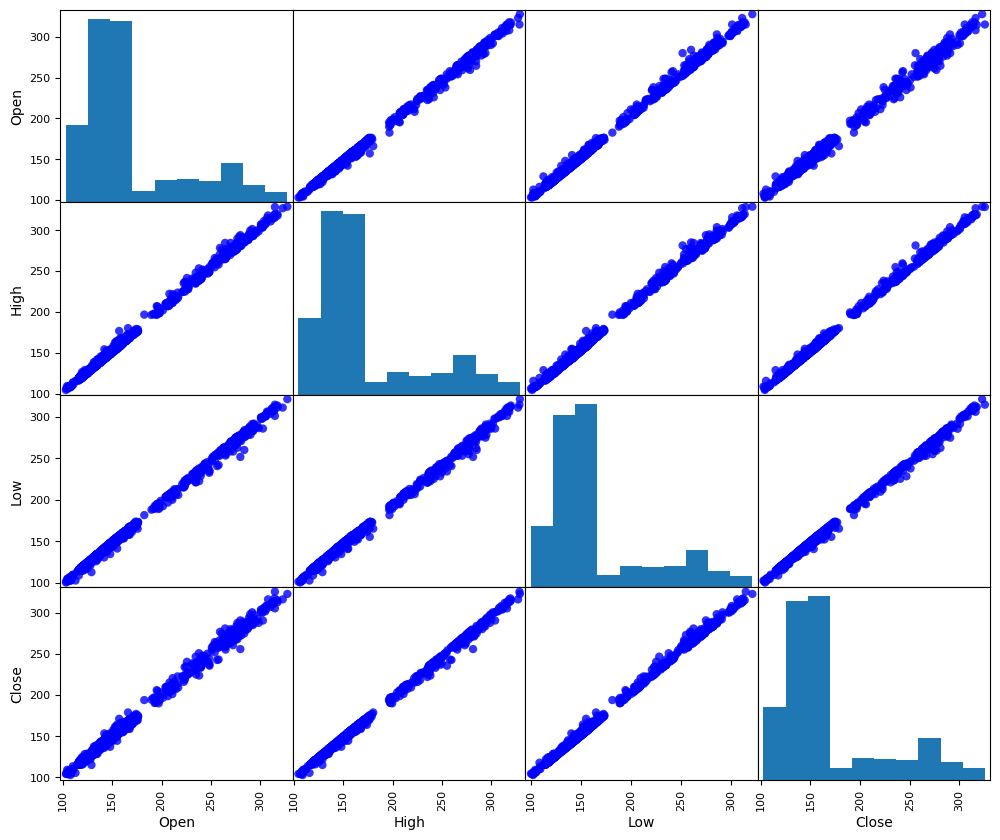

In [28]:
# Se selecciona: 'Open', 'High', 'Low' y la variable dependiente 'Close'
selected_features = df_global[['Open', 'High', 'Low', 'Close']]


# Con scatter_matrix obtenemos el gráfico para visualizar los datos y su relación
scatter_matrix(selected_features, figsize=(12,10), alpha=0.8, diagonal='hist', marker='o', color='b')

plt.show()

- Relación entre "Open" y "Close": Existe una relación positiva bastante lineal. Cuando el precio de apertura aumenta, el precio de cierre también tiende a aumentar, lo que sugiere que ambos valores están relacionados.

- Relación entre "High" y "Close":
De manera similar, hay una fuerte correlación positiva entre el precio más alto del día y el precio de cierre. Esto indica que los días en que el precio "High" es elevado, el precio de cierre también suele ser alto.

- Relación entre "Low" y "Close": También hay una relación positiva entre el precio más bajo del día y el precio de cierre, aunque parece ser un poco menos fuerte que la relación con "High" y "Open". Sin embargo, sigue mostrando un patrón lineal.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

inputs = ["Open", "High", "Low", "Last", "Total Trade Quantity", "Turnover (Lacs)"]
output = ["Close"]

x = df_global[inputs]
y = df_global[output]


def evaluate_model(train_size):
    # Dividir los datos según la proporción
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size, random_state=42)

    # Ajustar el modelo de regresión lineal
    lr = LinearRegression()
    lr.fit(x_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = lr.predict(x_test)

    # Error cuadrático medio y el R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2



In [ ]:
results = {}
train_test_ratios = [0.7, 0.5, 0.4]

for ratio in train_test_ratios:
    mse, r2 = evaluate_model(ratio)
    results[f'Train/Test {int(ratio*100)}-{int((1-ratio)*100)}'] = {'MSE': mse, 'R2': r2}

results

{'Train/Test 70-30': {'MSE': 0.16491508062299184, 'R2': 0.9999353090030664},
 'Train/Test 50-50': {'MSE': 0.17157763866850534, 'R2': 0.9999313264917049},
 'Train/Test 40-60': {'MSE': 0.18520728032391506, 'R2': 0.9999285675712266}}

# Análisis de los Resultados:

**Generalización del Modelo (R2 cercano a 1):**

Los valores de R2 son muy cercanos a 1 en todos los casos, lo que indica que el modelo tiene un buen ajuste y explica la mayor parte de la variabilidad de los datos, independientemente de la proporción de entrenamiento/prueba. Sin embargo, existe una leve disminución en R2 a medida que disminuye la proporción de datos de entrenamiento, pasando de 0.999935 a 0.999928.
Esto sugiere que el modelo tiene un buen desempeño en términos de capacidad predictiva, pero la leve disminución en R2 al usar menos datos de entrenamiento indica que el modelo puede perder un poco de precisión al ajustar sus parámetros con menos datos.

**Error Cuadrático Medio (MSE):**

El MSE (Error Cuadrático Medio) aumenta ligeramente a medida que la proporción de datos de entrenamiento disminuye:

- 70/30: MSE = 0.1649
- 50/50: MSE = 0.1716
- 40/60: MSE = 0.1852

Cuando se utiliza una proporción de 70/30 (más datos de entrenamiento), el modelo tiene un error de predicción más bajo en comparación con las otras proporciones. Esto se debe a que un mayor número de ejemplos de entrenamiento permite al modelo aprender mejor los patrones presentes en los datos.